In [71]:
#importing the necessary packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


In [102]:
#reading in the dataset
df=pd.read_csv('heart.csv')
df_causality = df.copy()
df_causality_1=df.copy()

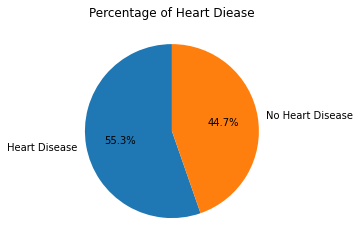

In [129]:
values = list(df['HeartDisease'].value_counts())
plt.pie(values,labels=['Heart Disease','No Heart Disease'],autopct='%1.1f%%',startangle=90)
plt.title('Percentage of Heart Diease')
plt.show()

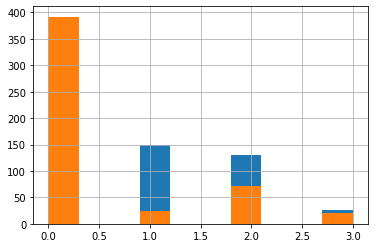

In [132]:
df['ChestPainType'][df['HeartDisease']==0].hist()
df['ChestPainType'][df['HeartDisease']==1].hist()

In [103]:
def fun(row,v_name,r_name):
  for i in range(len(v_name)):
    if(row<=v_name[i]):
      return r_name[i]
  return r_name[-1]

In [104]:
'''#converting all the columns with numerical values to categorical values
df_causality_1['Age']=df_causality['Age'].apply(fun,args=([39,60],['less_than_40','in_between_40_60','greater_than_60']))
df_causality_1['Cholesterol']=df_causality['Cholesterol'].apply(fun,args=([199,239],['normal','borderline_high','high']))
df_causality_1['RestingBP']=df_causality['RestingBP'].apply(fun,args=([119,129,139,179],['normal','Elevated','HyperTension_stage_1','HyperTension_stage_2','Hypertensive_crisis']))
df_causality_1['MaxHR']=df_causality['MaxHR'].apply(fun,args=([120,180],['Normal','high','very high']))
df_causality_1['Oldpeak']=df_causality['Oldpeak'].apply(fun,args=([2,3],['low','moderate','risk']))
'''

In [105]:
#converting all the columns with numerical values to categorical values
for i in range(len(df_causality)):
  if(df_causality['Age'][i]<40):
    df_causality['Age'][i]='less_than_40'
  elif(df_causality['Age'][i]>=40 & df_causality['Age'][i]<=60):
    df_causality['Age'][i]='in_between_40_60'
  elif(df_causality['Age'][i]>60):
    df_causality['Age'][i]='greater_than_60'
  if(df_causality['Cholesterol'][i]<200):
    df_causality['Cholesterol'][i]='normal'
  elif(df_causality['Cholesterol'][i]<=239):
    df_causality['Cholesterol'][i]='borderline_high'
  elif(df_causality['Cholesterol'][i]>239):
    df_causality['Cholesterol'][i]='high'
  if(df_causality['RestingBP'][i]<120):
    df_causality['RestingBP'][i]='normal'
  elif(df_causality['RestingBP'][i]<130):
    df_causality['RestingBP'][i]='Elevated'
  elif( df_causality['RestingBP'][i]<140):
    df_causality['RestingBP'][i]='Hypertension_stage_1'
  elif( df_causality['RestingBP'][i]<180):
    df_causality['RestingBP'][i]='Hypertension_stage_2'
  elif(df_causality['RestingBP'][i]>=180):
    df_causality['RestingBP'][i]='Hypertensive_Crisis'
  if(df_causality['MaxHR'][i]<=120):
    df_causality['MaxHR'][i]='Normal'
  elif(df_causality['MaxHR'][i]>120 and df_causality['MaxHR'][i]<=180):
    df_causality['MaxHR'][i]='high'
  elif(df_causality['MaxHR'][i]>180):
    df_causality['MaxHR'][i]='very_high'
  if(df_causality['Oldpeak'][i]<=2):
    df_causality['Oldpeak'][i]='low'
  elif(df_causality['Oldpeak'][i]<4):
    df_causality['Oldpeak'][i]='moderate'
  elif(df_causality['Oldpeak'][i]>=4):
    df_causality['Oldpeak'][i]='risk'

  


<ipython-input-105-edf7918fc319>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_causality['Age'][i]='in_between_40_60'
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
<ipython-input-105-edf7918fc319>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_causality['Cholesterol'][i]='high'
<ipython-input-105-edf7918fc31

In [106]:
df[df_causality==df_causality_1]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,M,ATA,NaN,289,0,Normal,172.0,N,0.0,Up,0
1,49.0,F,NAP,NaN,180,0,Normal,156.0,N,1.0,Flat,1
2,37.0,M,ATA,NaN,283,0,ST,98.0,N,0.0,Up,0
3,48.0,F,ASY,NaN,214,0,Normal,108.0,Y,1.5,Flat,1
4,54.0,M,NAP,NaN,195,0,Normal,122.0,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45.0,M,TA,110.0,264,0,Normal,132.0,N,1.2,Flat,1
914,NaN,M,ASY,NaN,193,1,Normal,141.0,N,NaN,Flat,1
915,57.0,M,ASY,NaN,131,0,Normal,115.0,Y,1.2,Flat,1
916,57.0,F,ATA,NaN,236,0,LVH,174.0,N,0.0,Flat,1


In [107]:
#encoding all the categorical values to numerical values
encoder=LabelEncoder()
for i in df.columns:

  if(df[i].dtype=='object'):
    df[i]=encoder.fit_transform(df[i])
df



,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [108]:
df_causality

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,in_between_40_60,M,ATA,Hypertension_stage_2,high,0,Normal,high,N,low,Up,0
1,in_between_40_60,F,NAP,Hypertension_stage_2,normal,0,Normal,high,N,low,Flat,1
2,less_than_40,M,ATA,Hypertension_stage_1,high,0,ST,Normal,N,low,Up,0
3,in_between_40_60,F,ASY,Hypertension_stage_1,borderline_high,0,Normal,Normal,Y,low,Flat,1
4,in_between_40_60,M,NAP,Hypertension_stage_2,normal,0,Normal,high,N,low,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,in_between_40_60,M,TA,normal,high,0,Normal,high,N,low,Flat,1
914,in_between_40_60,M,ASY,Hypertension_stage_2,normal,1,Normal,high,N,moderate,Flat,1
915,in_between_40_60,M,ASY,Hypertension_stage_1,normal,0,Normal,Normal,Y,low,Flat,1
916,in_between_40_60,F,ATA,Hypertension_stage_1,borderline_high,0,LVH,high,N,low,Flat,1


In [109]:
#one_hot encoding the causes and adding it the dataframe
def one_hot_encode(df_causality,col):
  if(df_causality[col].unique().size>2):
    y=pd.get_dummies(df_causality[col],prefix=col)
    df_causality.drop(col,axis=1,inplace=True)
    df_causality=df_causality.join(y)
  else:
    lb=LabelBinarizer()
    df_causality[col]=lb.fit_transform(df_causality[col])
  return df_causality

In [110]:
#y=df['HeartDisease']
effect=['HeartDisease']
y=df_causality[effect]
df_causality.drop(effect,axis=1,inplace=True)




In [111]:
#one hot encoding the dataframe
for i in df_causality.columns:
  df_causality=one_hot_encode(df_causality,i)
df_cause = df_causality.copy()

In [112]:
df_causality=df_causality.join(y)

In [113]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [114]:
# performing causal analysis based on the paper http://www.skleinberg.org/papers/uai09.pdf

def effect_prob():
    names_list=[]
    prior=[]
    for e in effect:
        print(e)
        t_f={}
        rel_c1=[]

        value_c1=[]

        df_e1 = df_causality[df_causality[e]>-1]
        df_e1_prob = df_e1[e].sum()/len(df_e1[e])
        print(e,df_e1_prob)
        for i in df_cause.columns:
            df_e1_c1_prob=0
            df_e1_c1 = df_e1[df_e1[i]>-1]
            if(df_e1_c1[i].sum()!=0):
                #print(i,e)
                df_e1_c1_prob = (df_e1_c1[e]*df_e1_c1[i]).sum()/df_e1_c1[i].sum()
            if(df_e1_c1_prob>df_e1_prob):
                prior.append(df_e1_c1_prob)
                rel_c1.append(i)
                value_c1.append(df_e1_c1_prob)
                t_f[i]=df_e1_c1_prob
        names_list.append(rel_c1)
        print(rel_c1)
        print(names_list)

        
        diff=[0 for k in rel_c1]
        for i in rel_c1:
            ind=rel_c1.index(i)
            for j in rel_c1:
                if(i is not j):
                    df_e1_c1 = df_e1[df_e1[i]>-1]
                    df_e1_c1_c2 = df_e1_c1[df_e1_c1[j]>-1]
                    if(((df_e1_c1_c2[i]*df_e1_c1_c2[j]).sum())!=0 and ((1-df_e1_c1_c2[i])*df_e1_c1_c2[j]).sum()!=0):
                        df_e1_c1_c2_prob = (df_e1_c1_c2[i]*df_e1_c1_c2[j]*df_e1_c1_c2[e]).sum()/(df_e1_c1_c2[i]*df_e1_c1_c2[j]).sum()
                        df_e1_notc1_c2_prob = ((1-df_e1_c1_c2[i])*df_e1_c1_c2[j]*df_e1_c1_c2[e]).sum()/((1-df_e1_c1_c2[i])*df_e1_c1_c2[j]).sum()
                        e_diff=df_e1_c1_c2_prob-df_e1_notc1_c2_prob
                        diff[ind]=diff[ind]+e_diff
            diff[rel_c1.index(i)] =diff[rel_c1.index(i)]/(len(rel_c1))
    print(diff)

    return names_list,diff,prior

names,diff,prior=effect_prob()


HeartDisease
HeartDisease 0.5533769063180828
['Sex', 'FastingBS', 'ExerciseAngina', 'ChestPainType_ASY', 'RestingBP_Hypertension_stage_2', 'RestingBP_Hypertensive_Crisis', 'Cholesterol_normal', 'RestingECG_LVH', 'RestingECG_ST', 'MaxHR_Normal', 'Oldpeak_moderate', 'Oldpeak_risk', 'ST_Slope_Down', 'ST_Slope_Flat']
[['Sex', 'FastingBS', 'ExerciseAngina', 'ChestPainType_ASY', 'RestingBP_Hypertension_stage_2', 'RestingBP_Hypertensive_Crisis', 'Cholesterol_normal', 'RestingECG_LVH', 'RestingECG_ST', 'MaxHR_Normal', 'Oldpeak_moderate', 'Oldpeak_risk', 'ST_Slope_Down', 'ST_Slope_Flat']]
[0.2301386228569265, 0.18189261254132932, 0.31755347465254974, 0.39364428561557757, 0.04294276928072126, 0.06560401192719882, 0.11745463056466939, -0.009835223270790712, 0.05269292772047825, 0.1521905982442719, 0.19457629742451768, 0.21203150622631164, 0.09432484783407283, 0.3182730556372841]


In [115]:
print(names[0])
n=list(names[0])
print(n[2])
s=np.where(np.array(diff)>=0.1)
l=np.array(n)[s]
df_causality[l]

['Sex', 'FastingBS', 'ExerciseAngina', 'ChestPainType_ASY', 'RestingBP_Hypertension_stage_2', 'RestingBP_Hypertensive_Crisis', 'Cholesterol_normal', 'RestingECG_LVH', 'RestingECG_ST', 'MaxHR_Normal', 'Oldpeak_moderate', 'Oldpeak_risk', 'ST_Slope_Down', 'ST_Slope_Flat']
ExerciseAngina


,Sex,FastingBS,ExerciseAngina,ChestPainType_ASY,Cholesterol_normal,MaxHR_Normal,Oldpeak_moderate,Oldpeak_risk,ST_Slope_Flat
0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,1
2,1,0,0,0,0,1,0,0,0
3,0,0,1,1,0,1,0,0,1
4,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
913,1,0,0,0,0,0,0,0,1
914,1,1,0,1,1,0,1,0,1
915,1,0,1,1,1,1,0,0,1
916,0,0,0,0,0,0,0,0,1


In [116]:
def results(model,df,df_c,e):
  x_train,x_test,y_train,y_test=train_test_split(df.drop(e,axis=1),df[e],test_size=0.1,random_state=42)
  x_train_c,x_test_c,y_train_c,y_test_c=train_test_split(df_c,df[e],test_size=0.1,random_state=42)
  model_c =model
  y_pred=model.fit(x_train,y_train).predict(x_test)
  y_pred_c=model_c.fit(x_train_c,y_train_c).predict(x_test_c)
  cm=confusion_matrix(y_test,y_pred)
  cm_c=confusion_matrix(y_test_c,y_pred_c)
  print("the confusion matrix of normal data")
  print(cm)
  print("the confusion matrix with causal analysis")
  print(cm_c)
  print("the confusion matrix of normal data")
  print(accuracy_score(y_test,y_pred))
  print("the confusion matrix with causal analysis")
  print(accuracy_score(y_test_c,y_pred_c))
  print(cross_val_score(model,df.drop(e,axis=1),df[e],cv=5),cross_val_score(model_c,df_c,df[e],cv=5))
  fig, axes = plt.subplots(ncols=2, figsize=(8,4))
  ax,ax_c=axes
  ax= sns.heatmap(cm,annot=True,ax=ax)
  #.matshow(cm,cmap='coolwarm')
  ax_c=sns.heatmap(cm_c,annot=True,ax=ax_c)
  #.matshow(cm_c,cmap='coolwarm')
  fig.tight_layout()





In [117]:
lr=LogisticRegression(random_state=42,max_iter=5000)
svc=SVC(random_state=42)
dtc=DecisionTreeClassifier(random_state=42)

the confusion matrix of normal data
[[32  6]
 [ 7 47]]
the confusion matrix with causal analysis
[[33  5]
 [ 6 48]]
the confusion matrix of normal data
0.8586956521739131
the confusion matrix with causal analysis
0.8804347826086957
[0.82065217 0.82065217 0.82065217 0.81420765 0.76502732] [0.88586957 0.83695652 0.82608696 0.84699454 0.75956284]


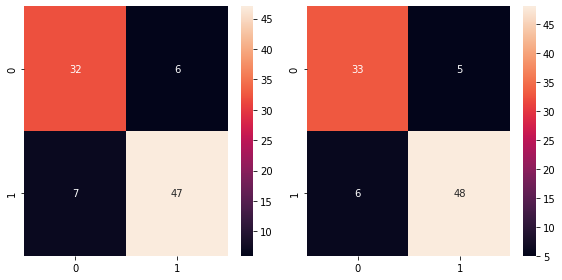

In [122]:
results(lr,df,df_causality[l],'HeartDisease')

the confusion matrix of normal data
[[30  8]
 [12 42]]
the confusion matrix with causal analysis
[[30  8]
 [10 44]]
the confusion matrix of normal data
0.782608695652174
the confusion matrix with causal analysis
0.8043478260869565
[0.77173913 0.75       0.79347826 0.74863388 0.67759563] [0.88043478 0.83152174 0.875      0.79234973 0.76502732]


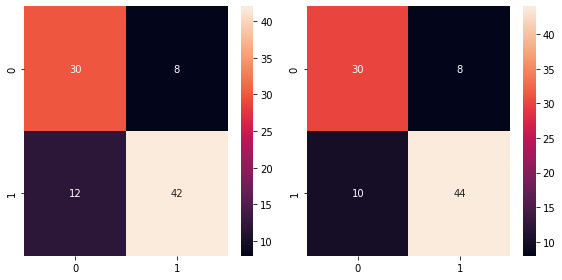

In [119]:
results(dtc,df,df_causality[l],'HeartDisease')

the confusion matrix of normal data
[[26 12]
 [16 38]]
the confusion matrix with causal analysis
[[32  6]
 [ 4 50]]
the confusion matrix of normal data
0.6956521739130435
the confusion matrix with causal analysis
0.8913043478260869
[0.60869565 0.78804348 0.69021739 0.71584699 0.61748634] [0.92391304 0.85869565 0.85869565 0.83060109 0.7704918 ]


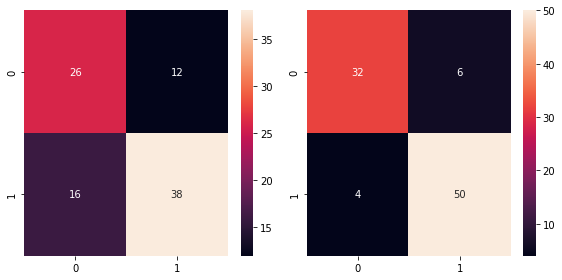

In [120]:
results(svc,df,df_causality[l],'HeartDisease')